# Homework 6 - Olivier Gilbert - 30/11/2025

## 1.

### a)
I decided to add the columns for the discovery method, including only astrometry, radial velocity, direct imaging, transits,
and microlensing, as they are the only methods we're interested in.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
plt.rc("axes", labelsize=16) 

df = pd.read_csv(r"PSCompPars_2025.11.30_08.48.21.csv", skiprows=124)
df = df[df["discoverymethod"].isin(["Radial Velocity","Imaging","Microlensing","Transit","Astrometry"])]
print(df["discoverymethod"].unique())
for col in df.columns:
    if col.startswith("pl") and col.__contains__("mass"):
        print(col) # print the keys to access the mass in Earth masses or Jupiter masses


['Radial Velocity' 'Imaging' 'Microlensing' 'Transit' 'Astrometry']
pl_bmasse
pl_bmasseerr1
pl_bmasseerr2
pl_bmasselim
pl_bmassj
pl_bmassjerr1
pl_bmassjerr2
pl_bmassjlim
pl_bmassprov


### b)

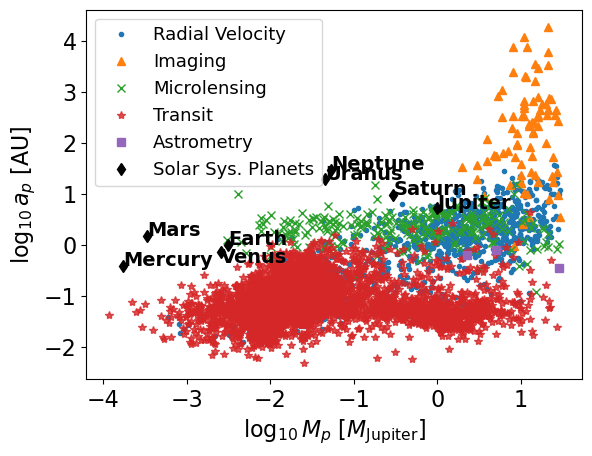

In [57]:
symbols = [".","^","x","*","s"]
for i,detection_method in enumerate(df["discoverymethod"].unique()):
    sub_df = df[df["discoverymethod"] == detection_method]
    pl_masses = sub_df["pl_bmassj"]
    pl_semi_major_axis = sub_df["pl_orbsmax"]

    plt.plot(np.log10(pl_masses), np.log10(pl_semi_major_axis), ls="None", marker=symbols[i], alpha=(1 if detection_method!="Transit" else 0.8), label=detection_method)

planets = [
    "Mercury", "Venus", "Earth", "Mars",
    "Jupiter", "Saturn", "Uranus", "Neptune"
]
masses_kg = [
    3.3011e23,
    4.8675e24,
    5.97237e24,
    6.4171e23,
    1.89813e27,
    5.6834e26,
    8.6810e25,
    1.02413e26
]
from astropy.constants import M_jup
masses_M_jup = (np.array(masses_kg)/M_jup).value
a_AU = [
    0.387098,
    0.723332,
    1.00000011,
    1.523679,
    5.20260,
    9.5549,
    19.2184,
    30.11
]
for i, planet in enumerate(planets):
    plt.plot(np.log10(masses_M_jup[i]), np.log10(a_AU[i]), marker="d", color="black", ls="None", label=(None if i!=0 else "Solar Sys. Planets"))
    plt.text(np.log10(masses_M_jup[i]), np.log10(a_AU[i])+(0 if planet!="Venus" else -0.2), planet, fontsize=14, fontweight="bold")


plt.xlabel(r"$\log_{10}M_p$ [$M_\mathrm{Jupiter}$]")
plt.ylabel(r"$\log_{10}a_p$ [AU]")
plt.legend(fontsize=13)
plt.show()

### c)

The expression for the astrometric signal is:
$$\theta_\star = \frac{M_p}{M_\star}\frac{a_p}{d}$$

For a wobble of 10 micro-arcsec for a Sun-like star at $d\sim10\mathrm{pc}$, this becomes
$$10\mathrm{mas} = \frac{M_p}{M_\odot}\frac{a_p}{10\mathrm{pc}}$$
$$a_p = \left(\frac{M_p}{M_\odot}\right)^{-1}\cdot 10\mathrm{mas} \cdot 10\mathrm{pc}$$
$$a_p = \left(\frac{M_p}{M_\odot}\right)^{-1}\cdot 0.1\mathrm{AU} $$

In [42]:
import astropy.units as u
print(((10*u.mas).to(u.rad).value * 10*u.pc).to(u.AU))

0.10000000000000002 AU


### d)
The expression for the RV signal is
$$\text{RV signal} = \frac{M_p}{M_\star}\sqrt{\frac{GM_\star}{a_p}}\sin i$$

For an RV signal of 1m/s and for a Sun-like star, this becomes
$$1\mathrm{m/s} = \frac{M_p \sin i}{M_\odot}\sqrt{\frac{GM_\odot}{a_p}}$$
$$a_p = \left(\frac{M_p \sin i}{M_\odot}\right)^{2}\cdot 8.871\times 10^{8}\mathrm{AU}$$

In [46]:
from astropy.constants import M_sun, G
print(((G*M_sun)/(1*(u.m/u.s))**2).to(u.AU))

887127867.3888236 AU


### e)
Direct imaging lets us image planets with masses $M_p\geq 5M_\mathrm{Jupiter}$ and semi-major
axes $a_p \geq 10\mathrm{AU}$.

### f)
The equation for the SNR of a transit detection is
$$\text{SNR transit} \approx \frac{1}{\sigma_\mathrm{phot}}\sqrt{\frac{N}{\pi}}a_p^{-1/2}R_s^{-3/2}R_p^2$$

We will normalize using $R_p=R_\oplus$, $R_s=R_\odot$, and $a_p=1\mathrm{AU}$ as the detection limit.
$$\text{SNR detect. lim.} \approx \frac{1}{\sigma_\mathrm{phot}}\sqrt{\frac{N}{\pi}}(1\mathrm{AU})^{-1/2}(R_\odot)^{-3/2}(R_\oplus)^2$$

We can then take the first equation and modify it to find the relation between the mass and the semi-major axis:
$$\text{SNR transit} \approx \frac{1}{\sigma_\mathrm{phot}}\sqrt{\frac{N}{\pi}}a_p^{-1/2}R_s^{-3/2}R_p^2$$
$a_p$ is already the semi-major axis, but we'll convert the radius of the planet to a mass assuming a constant global density $\rho_p$ with $M_p=\frac{4\pi R_p^3 \rho_p}{3}$:
$$R_p = \left(\frac{3M_p}{4\pi \rho_p}\right)^{1/3}$$
$$\text{SNR transit} \approx \frac{1}{\sigma_\mathrm{phot}}\sqrt{\frac{N}{\pi}}a_p^{-1/2}R_s^{-3/2}\left(\frac{3M_p}{4\pi \rho_p}\right)^{2/3}$$
We can then insert our normalization for the detection limit and isolate $a_p$:
$$\frac{1}{\sigma_\mathrm{phot}}\sqrt{\frac{N}{\pi}}(1\mathrm{AU})^{-1/2}(R_\odot)^{-3/2}(R_\oplus)^2 \approx \frac{1}{\sigma_\mathrm{phot}}\sqrt{\frac{N}{\pi}}a_p^{-1/2}R_s^{-3/2}\left(\frac{3M_p}{4\pi \rho_p}\right)^{2/3}$$

$$a_p^{1/2}(R_\odot)^{-3/2}(R_\oplus)^2 \approx R_s^{-3/2}\left(\frac{3M_p}{4\pi \rho_p}\right)^{2/3}\cdot (1\mathrm{AU})^{1/2}$$
$$a_p^{1/2} \approx \left(\frac{R_s}{R_\odot}\right)^{-3/2}\left(\frac{3M_p}{4\pi \rho_p}\right)^{2/3}(R_\oplus)^{-2}\cdot (1\mathrm{AU})^{1/2}$$
$$a_p \approx \left(\frac{R_s}{R_\odot}\right)^{-3}\left(\frac{3M_p}{4\pi \rho_p}\right)^{4/3}(R_\oplus)^{-4}\cdot (1\mathrm{AU})$$
Since we are assuming a constant density for all planets, we can calculate it using Earth:
$$\rho_p = \frac{M_\oplus}{V_\oplus}=\frac{3M_\oplus}{4\pi R_\oplus^3}$$
Substituting this expression into our $a_p-M_p$ relation gives us this simpler equation:
$$a_p \approx \left(\frac{R_s}{R_\odot}\right)^{-3}\left(\frac{M_p}{M_\oplus}\right)^{4/3}\cdot (1\mathrm{AU})$$
And if we assume a Sun-like star like for the other methods, we obtain
$$a_p \approx \left(\frac{M_p}{M_\oplus}\right)^{4/3}\cdot (1\mathrm{AU})$$



### g)
For microlensing, the equation for the semi-major axis can be approximated to be the Einstein ring:
$$a_p \approx r_E = D_l \theta_E$$
$$a_p = D_l \sqrt{\frac{4GM}{c^2}\frac{D_{ls}}{D_l D_s}}$$

### h)

Making a plot that shows the parameter space of detectable planets for different methods.

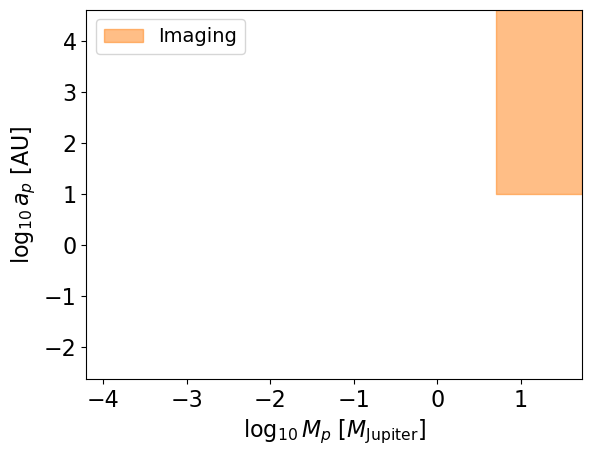

In [55]:
symbols = [".","^","x","*","s"]
for i,detection_method in enumerate(df["discoverymethod"].unique()):
    sub_df = df[df["discoverymethod"] == detection_method]
    pl_masses = sub_df["pl_bmassj"]
    pl_semi_major_axis = sub_df["pl_orbsmax"]

    plt.plot(np.log10(pl_masses), np.log10(pl_semi_major_axis), ls="None", marker=symbols[i], alpha=(1 if detection_method!="Transit" else 0.8), label=detection_method)

planets = [
    "Mercury", "Venus", "Earth", "Mars",
    "Jupiter", "Saturn", "Uranus", "Neptune"
]
masses_kg = [
    3.3011e23,
    4.8675e24,
    5.97237e24,
    6.4171e23,
    1.89813e27,
    5.6834e26,
    8.6810e25,
    1.02413e26
]
from astropy.constants import M_jup
masses_M_jup = (np.array(masses_kg)/M_jup).value
a_AU = [
    0.387098,
    0.723332,
    1.00000011,
    1.523679,
    5.20260,
    9.5549,
    19.2184,
    30.11
]
for i, planet in enumerate(planets):
    plt.plot(np.log10(masses_M_jup[i]), np.log10(a_AU[i]), marker="d", color="black", ls="None", label=(None if i!=0 else "Solar Sys. Planets"))
    plt.text(np.log10(masses_M_jup[i]), np.log10(a_AU[i]), planet, fontsize=14, fontweight="bold")

xlim = plt.xlim()
ylim = plt.ylim()
plt.legend(fontsize=13)
plt.close()
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
symbols = [".","^","x","*","s"]
for i,detection_method in enumerate(df["discoverymethod"].unique()):
    sub_df = df[df["discoverymethod"] == detection_method]
    if detection_method == "Imaging":
        plt.fill_between([np.log10(5), xlim[1]], np.log10(10), ylim[1], color=colors[i], alpha=0.5, label=detection_method)
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel(r"$\log_{10}M_p$ [$M_\mathrm{Jupiter}$]")
plt.ylabel(r"$\log_{10}a_p$ [AU]")
plt.legend(fontsize=14)
plt.show()
